In [1]:
import locale
from visualize import viztool
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
import numpy as np
from scipy import stats
import seaborn as sns

# Set locale to German
locale.setlocale(locale.LC_TIME, "de_DE.utf8")

# Apply the default theme
sns.set_theme()


def save_data():
    df = pd.DataFrame()

    for city in ["duesseldorf", "kiel", "dresden"]:
        city_df = viztool.retrieveSlotData(city=city, concern=None)
        df = pd.concat([df, city_df])

    df.to_csv("data.csv")


# save_data()

df = viztool.read_data_from_csv()

df["days_open"] = df["total_delta"].dt.total_seconds() / 3600 / 24

df["days_until_slot"] = df["time_until_slot"].dt.total_seconds() / 3600 / 24

In [2]:
# prevent exponential notation
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Unnamed: 0,s_id,timeslot,a_id,available,taken,count_availabilities,hour,delta,time_until_slot,total_delta,days_open,days_until_slot
count,1599791.00,1599791.00,1599791,1599791.00,1599790,1576325,1599791.00,1599791.00,1576324,1576325,1599791,1599791.00,1576325.00
mean,385313.88,30985.19,2024-12-09 05:24:33.434718720,385314.88,2024-11-21 17:41:30.582264832,2024-11-22 00:34:33.690019328,48.29,10.98,0 days 12:19:13.752972104,16 days 20:54:15.440838659,10 days 10:38:25.439985597,10.44,16.87
min,0.00,1.00,2024-11-08 09:35:00,1.00,2024-11-08 09:27:00,2024-11-08 09:29:00,1.00,7.00,0 days 00:01:00,-1 days +16:47:00,0 days 00:00:00,0.00,-0.30
25%,133315.50,6571.00,2024-11-27 12:10:00,133316.50,2024-11-14 04:03:00,2024-11-14 05:52:00,6.00,9.00,0 days 00:20:00,7 days 11:39:00,1 days 23:17:30,1.97,7.49
50%,330351.00,23112.00,2024-12-05 10:25:00,330352.00,2024-11-20 10:44:00,2024-11-20 18:11:00,20.00,11.00,0 days 02:26:00,14 days 01:51:00,11 days 05:57:00,11.25,14.08
75%,601271.50,44062.00,2024-12-16 10:45:00,601272.50,2024-11-28 12:39:00,2024-11-28 21:04:00,70.00,13.00,0 days 09:49:00,20 days 14:54:00,17 days 14:02:00,17.58,20.62
max,1001219.00,119215.00,2025-02-03 15:45:00,1001220.00,2024-12-10 01:06:00,2024-12-10 01:10:00,219.00,17.00,25 days 03:02:00,59 days 19:08:00,31 days 12:28:00,31.52,59.80
std,285338.07,28209.43,NaN,285338.07,NaN,NaN,59.97,2.40,1 days 07:48:05.475731542,14 days 03:18:47.973141194,7 days 22:29:23.592574034,7.94,14.14


In [3]:
concerns = [
    "Personalausweis - Antrag",
    "Reisepass - Antrag",
    "Anmeldung",
    "Ummeldung",
    "Abmeldung",
]

# cities = ["Duesseldorf", "Dresden", "Kiel"]
# cities = ["Duesseldorf", "Dresden"]
cities = ["Duesseldorf"]

concern = "Personalausweis - Antrag"

filtered_df = df[
    (df["concern"] == concern)
    & (df["city"].isin(cities))
    # & (df["office"].isin(offices))
]
# filtered_df.dropna(subset=["taken"], inplace=True)

# remove where delta smaller than 5 min
# filtered_df = filtered_df[filtered_df["total_delta"] > pd.Timedelta(minutes=5)]
# filtered_df.sort_values("total_delta", inplace=True)

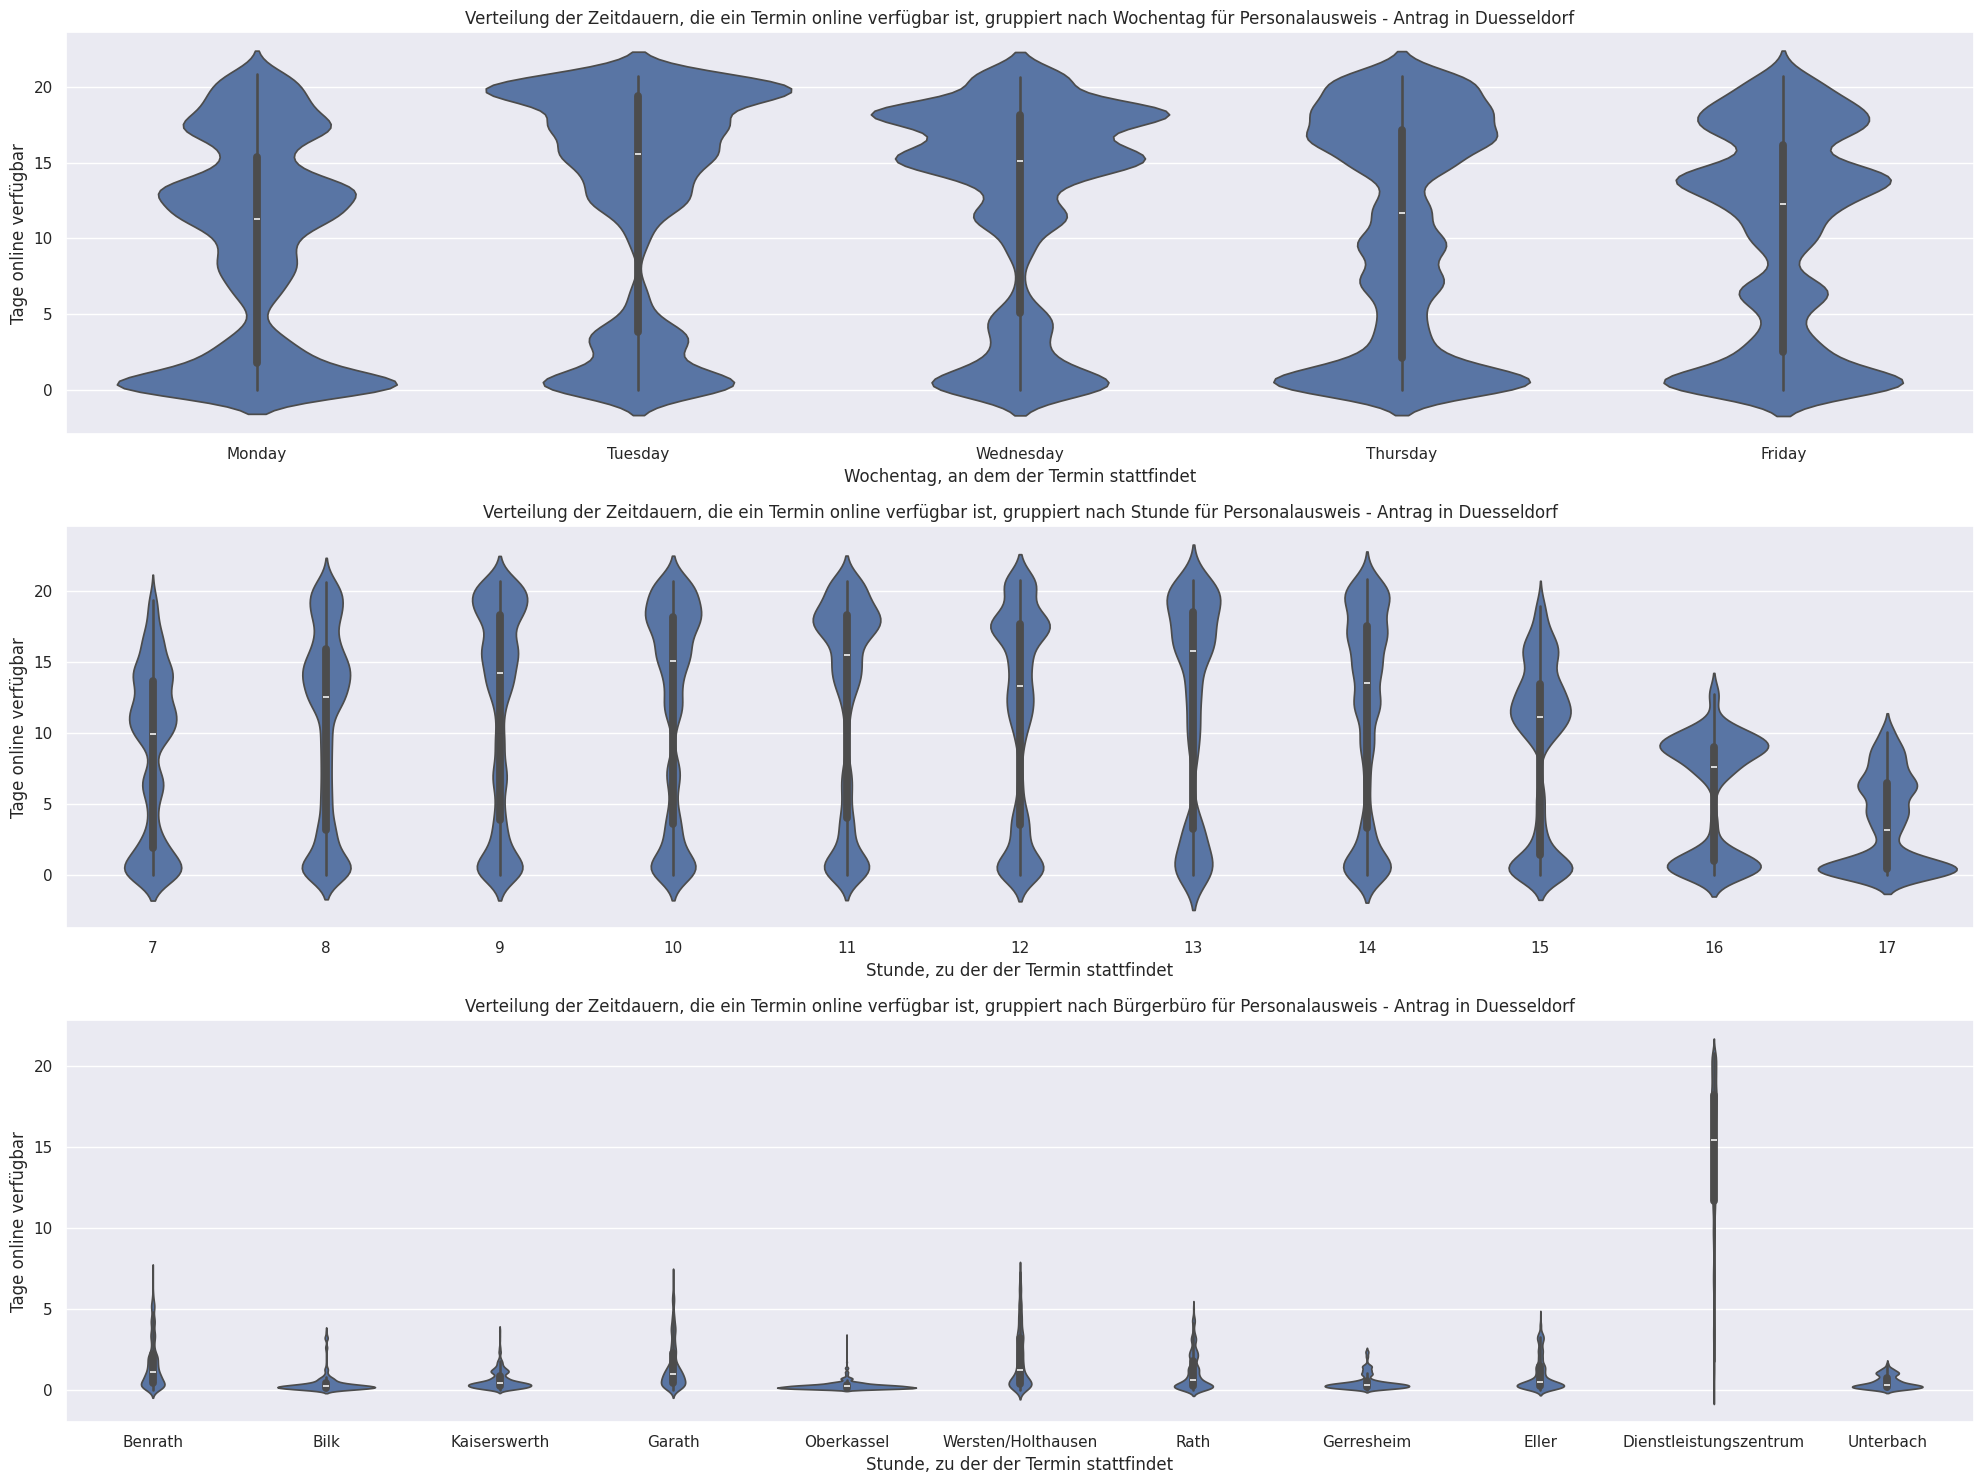

In [4]:
categories = ["weekday", "hour", "office"]
label = {"weekday": "Wochentag", "hour": "Stunde", "office": "Bürgerbüro"}

fig, ax = plt.subplots(
    figsize=(20, 5 * len(categories)), nrows=len(categories), ncols=1
)

for index, value_to_group_by in enumerate(categories):
    sns.violinplot(
        x=value_to_group_by,
        y="days_open",
        data=filtered_df,
        ax=ax[index],
        # inner="point",
        # hue="city",
        # split=True,
        # gap=0.1,
        order=(
            [
                "Monday",
                "Tuesday",
                "Wednesday",
                "Thursday",
                "Friday",
            ]
            if value_to_group_by == "weekday"
            else None
        ),
    )
    # sns.boxplot(
    #     x=value_to_group_by,
    #     y="days_open",
    #     data=filtered_df,
    #     ax=ax[index],
    #     showfliers=True,
    #     linewidth=1,
    #     fill=False,
    #     hue="city",
    # )
    title = f"Verteilung der Zeitdauern, die ein Termin online verfügbar ist, gruppiert nach {label[value_to_group_by]} für {concern} in {' und '.join(cities)}"
    ax[index].set_title(title)
    ax[index].set_xlabel(
        f"{'Wochentag, an dem der Termin stattfindet' if value_to_group_by == 'weekday' else 'Stunde, zu der der Termin stattfindet'}"
    )
    ax[index].set_ylabel("Tage online verfügbar")
    # ax[index].legend(
    #     title="Stadt", handles=ax[index].get_legend_handles_labels()[0], labels=cities
    # )
plt.tight_layout()

plt.savefig("./bachelorarbeit/bilder/violinplot_days_open.png", bbox_inches="tight")
plt.show()

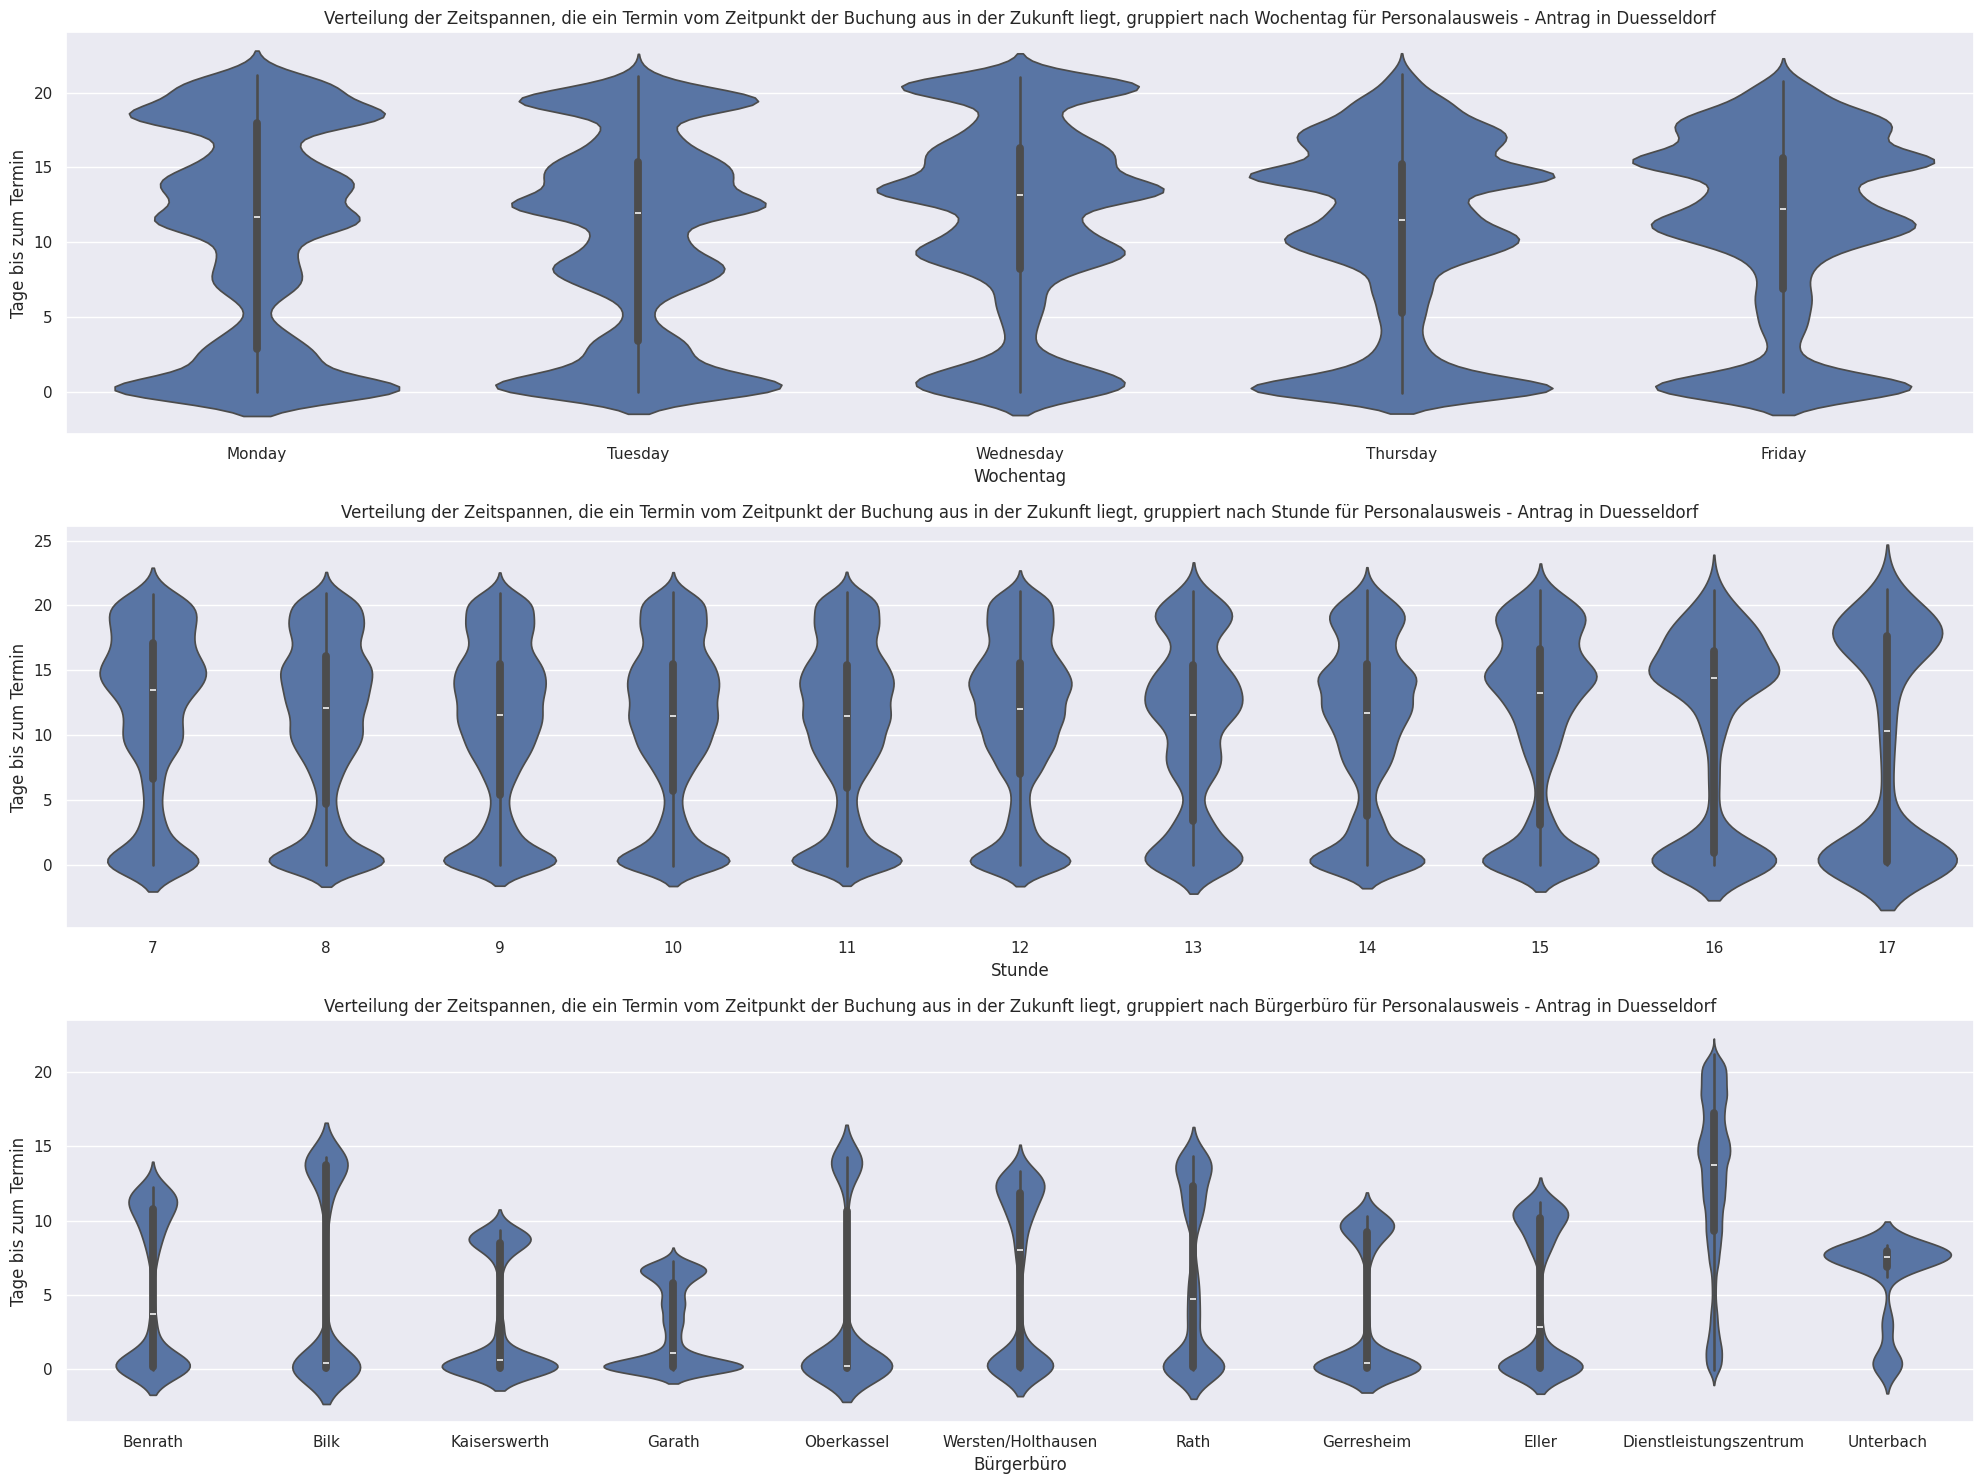

In [5]:
fig, ax = plt.subplots(
    figsize=(20, 5 * len(categories)), nrows=len(categories), ncols=1
)

for index, value_to_group_by in enumerate(categories):
    sns.violinplot(
        x=value_to_group_by,
        y="days_until_slot",
        data=filtered_df,
        ax=ax[index],
        # inner="quart",
        # hue="city",
        # split=True,
        # gap=0.1,
        order=(
            [
                "Monday",
                "Tuesday",
                "Wednesday",
                "Thursday",
                "Friday",
                # "Saturday",
            ]
            if value_to_group_by == "weekday"
            else None
        ),
    )
    title = f"Verteilung der Zeitspannen, die ein Termin vom Zeitpunkt der Buchung aus in der Zukunft liegt, gruppiert nach {label[value_to_group_by]} für {concern} in {' und '.join(cities)}"
    ax[index].set_title(title)
    # ax[index].set_xlabel(
    #     f"{'Wochentag, an dem der Termin stattfindet' if value_to_group_by == 'weekday' else 'Stunde, zu der der Termin stattfindet'}"
    # )
    ax[index].set_xlabel(f"{label[value_to_group_by]}")
    ax[index].set_ylabel("Tage bis zum Termin")
plt.tight_layout()

plt.savefig(
    "./bachelorarbeit/bilder/violinplot_days_until_slot.png", bbox_inches="tight"
)
plt.show()

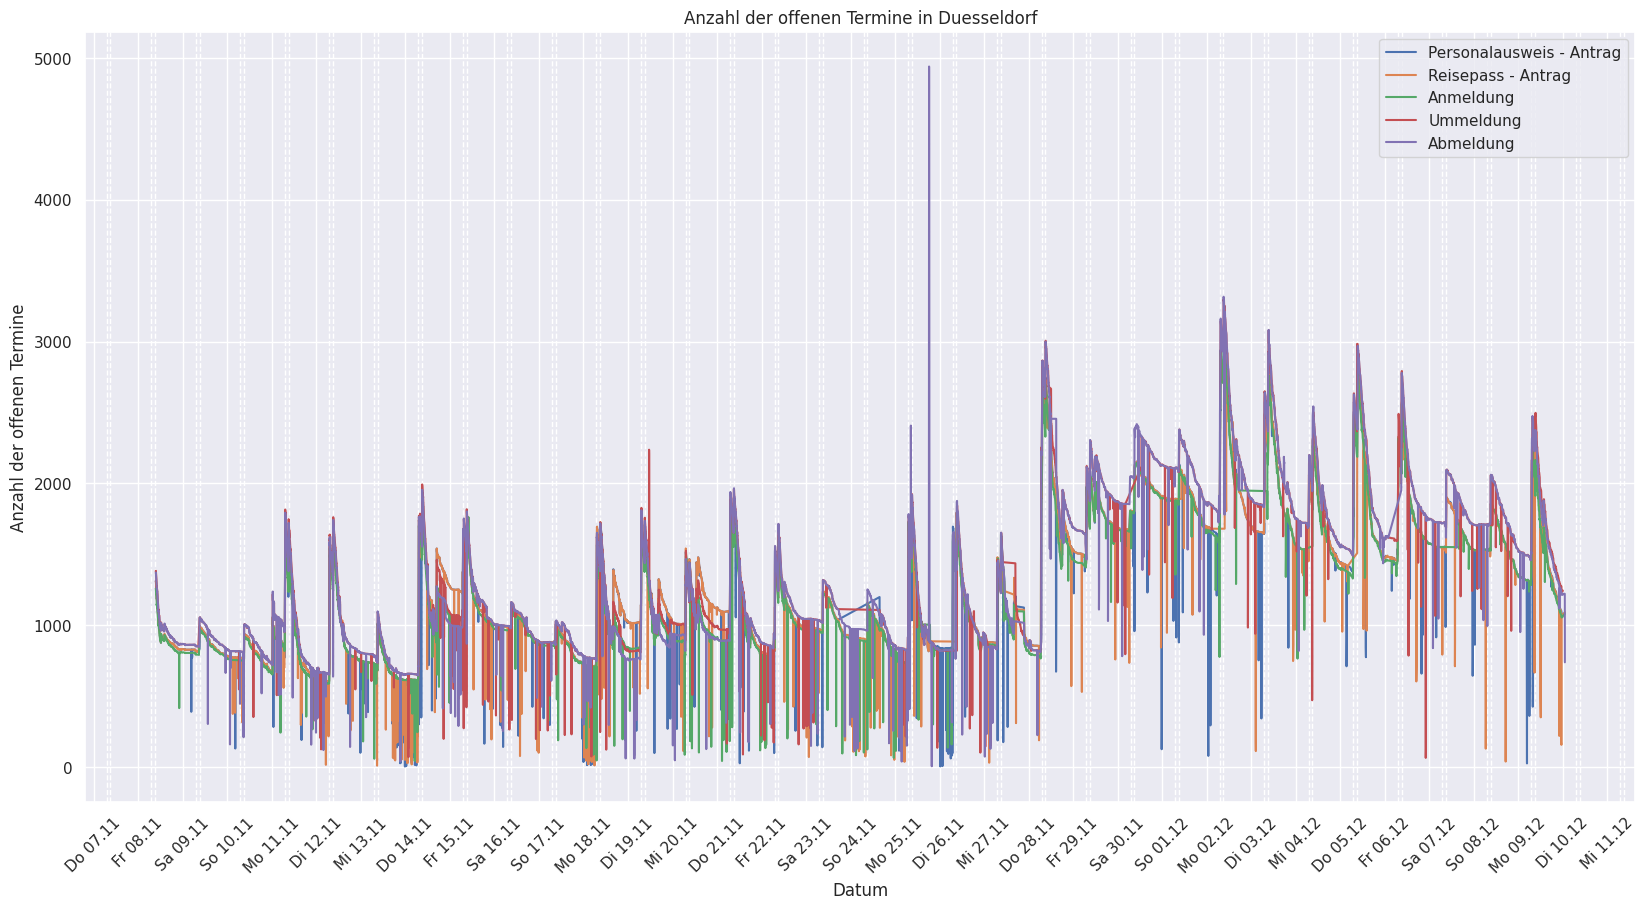

In [6]:
# duesseldorf all concerns
fig, ax = plt.subplots(figsize=(20, 10))



for concern in concerns:
    count = viztool.create_time_series(
        df, city="Duesseldorf", concern=concern
    )
    count["concern"] = concern
    sns.lineplot(data=count, x="timestamp", y="count", ax=ax, label=concern)

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%a %d.%m"))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=[7, 9]))
ax.xaxis.grid(True, which="minor", linestyle="--")

ax.set_title("Anzahl der offenen Termine in Duesseldorf")
ax.set_xlabel("Datum")
ax.set_ylabel("Anzahl der offenen Termine")

plt.savefig(
    f"bachelorarbeit/bilder/offene_termine_duesseldorf_alle_anliegen.png",
)

plt.show()

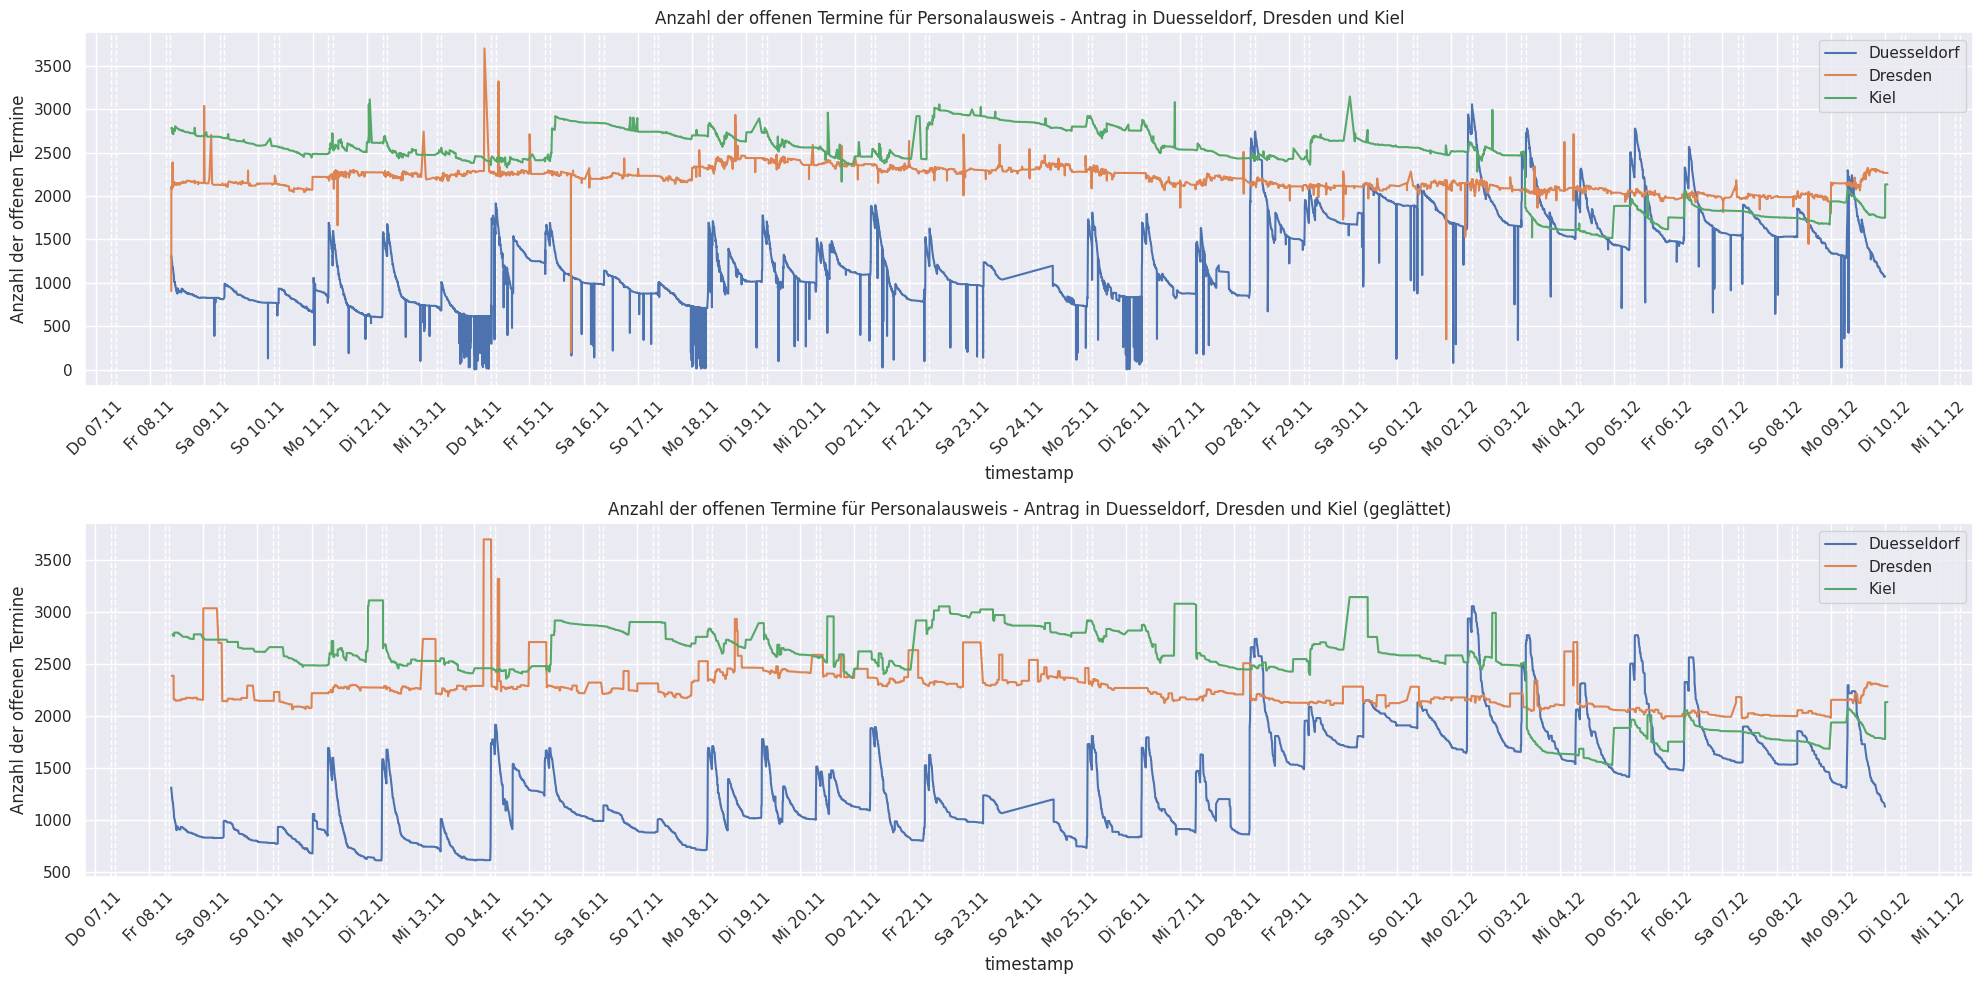

In [7]:
fig, axs = plt.subplots(figsize=(20, 10), nrows=2, ncols=1)

for index, variant in enumerate(["count", "smooth"]):
    for concern in ["Duesseldorf", "Dresden", "Kiel"]:
        count = viztool.create_time_series(
            df, city=concern, concern="Personalausweis - Antrag"
        )

        # glättung durch maximum
        count["smooth"] = count["count"].rolling(window=15).max()
        sns.lineplot(data=count, x="timestamp", y=variant, ax=axs[index], label=concern)

    axs[index].xaxis.set_major_locator(mdates.DayLocator())
    axs[index].xaxis.set_major_formatter(mdates.DateFormatter("%a %d.%m"))
    plt.setp(axs[index].xaxis.get_majorticklabels(), rotation=45)

    axs[index].xaxis.set_minor_locator(mdates.HourLocator(byhour=[7, 9]))
    axs[index].xaxis.grid(True, which="minor", linestyle="--")

    axs[index].set_title(
        f"Anzahl der offenen Termine für Personalausweis - Antrag in Duesseldorf, Dresden und Kiel"
        + (" (geglättet)" if variant == "smooth" else "")
    )
    # axs[index].set_xlabel("Datum")
    axs[index].set_ylabel("Anzahl der offenen Termine")

plt.tight_layout()

plt.savefig(
    f"bachelorarbeit/bilder/offene_termine_personalausweis_alle_staedte.png",
)
plt.show()

In [8]:
duesseldorf = df[(df["concern"] == "Personalausweis - Antrag") & (df["city"] == "Duesseldorf")]


dues_ohne_dz = viztool.create_time_series(
    duesseldorf,
    city="Duesseldorf",
    concern="Personalausweis - Antrag",
    exclude_office="Dienstleistungszentrum",
)

dues_nur_dz = viztool.create_time_series(
    duesseldorf,
    city="Duesseldorf",
    concern="Personalausweis - Antrag",
    office="Dienstleistungszentrum",
)

# dues_nur_dz[dues_nur_dz["delta"] < pd.Timedelta(5, unit="m")]

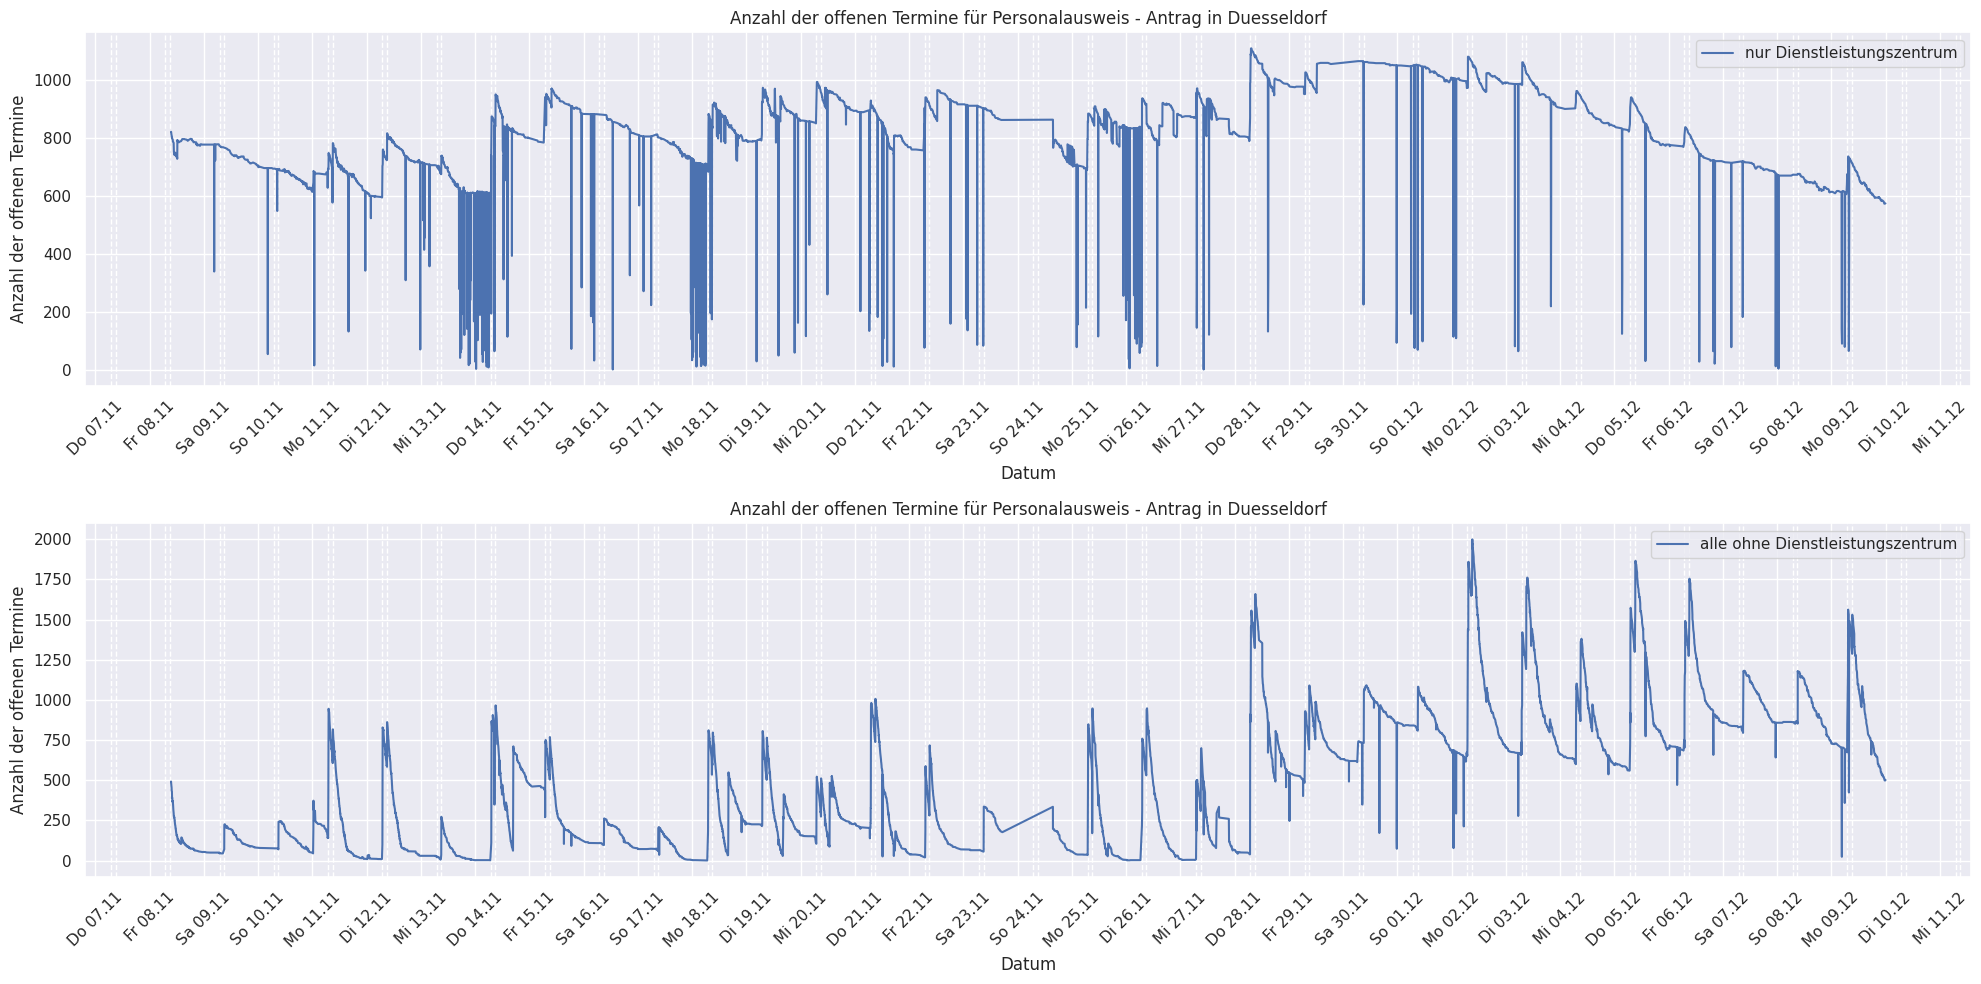

In [9]:
# duesseldorf ohne Dienstleistungszenrum
fig, axs = plt.subplots(figsize=(20, 10), nrows=2, ncols=1)

for index, data in enumerate([dues_nur_dz, dues_ohne_dz]):
    # data['smooth'] = data['count'].rolling(window=15).max()
    sns.lineplot(
        data=data,
        x="timestamp",
        y="count",
        # y="smooth",
        ax=axs[index],
        label=f"{'nur Dienstleistungszentrum' if index == 0 else 'alle ohne Dienstleistungszentrum'}",
    )

    axs[index].xaxis.set_major_locator(mdates.DayLocator())
    axs[index].xaxis.set_major_formatter(mdates.DateFormatter("%a %d.%m"))
    plt.setp(axs[index].xaxis.get_majorticklabels(), rotation=45)

    axs[index].xaxis.set_minor_locator(mdates.HourLocator(byhour=[7, 9]))
    axs[index].xaxis.grid(True, which="minor", linestyle="--")

    axs[index].set_title(
        "Anzahl der offenen Termine für Personalausweis - Antrag in Duesseldorf"
    )
    axs[index].set_xlabel("Datum")
    axs[index].set_ylabel("Anzahl der offenen Termine")

plt.tight_layout()
plt.savefig(
    f"bachelorarbeit/bilder/offene_termine_personalausweis_duesseldorf_mit_ohne_dz.png",
)
plt.show()

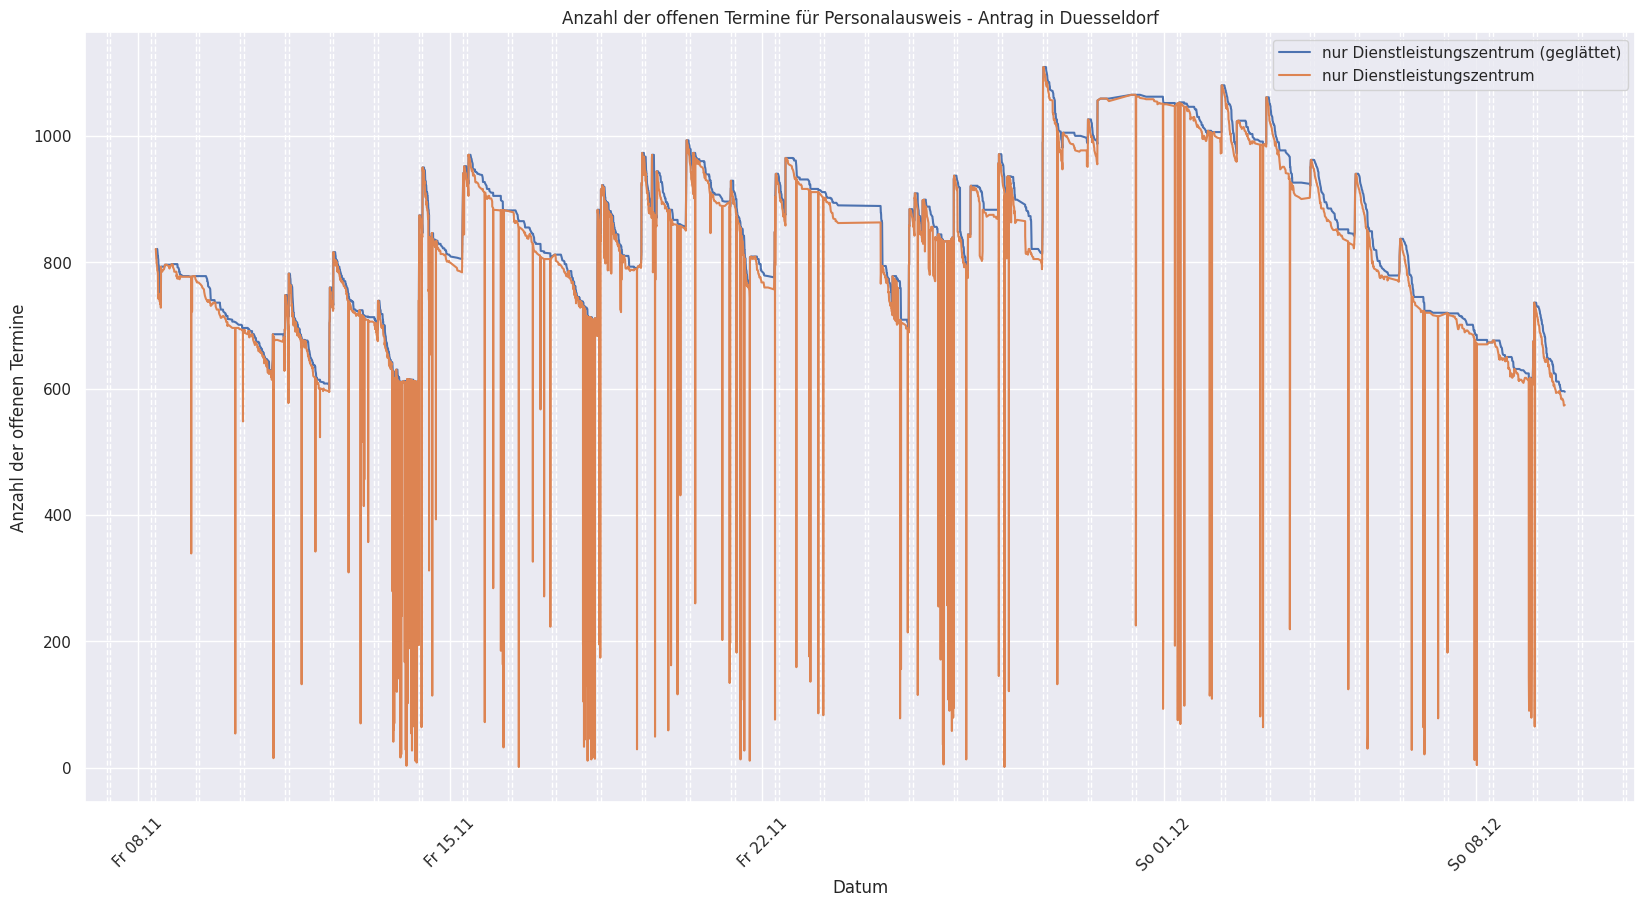

In [10]:
# duesseldorf personalausweis antrag nur DZ geglättet
fig, ax = plt.subplots(figsize=(20, 10))

dues_nur_dz["smoothed"] = dues_nur_dz["count"].rolling(window=15).max()
y = "smoothed"

sns.lineplot(
    data=dues_nur_dz,
    x="timestamp",
    y=y,
    ax=ax,
    label="nur Dienstleistungszentrum (geglättet)",
)
sns.lineplot(
    data=dues_nur_dz,
    x="timestamp",
    y="count",
    ax=ax,
    label="nur Dienstleistungszentrum",
)

ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1, 8, 15, 22]))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%a %d.%m"))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=[7, 9]))
ax.xaxis.grid(True, which="minor", linestyle="--")

ax.set_title(
    "Anzahl der offenen Termine für Personalausweis - Antrag in Duesseldorf"
)

ax.set_xlabel("Datum")
ax.set_ylabel("Anzahl der offenen Termine")

# plt.savefig(
#     f"bachelorarbeit/bilder/offene_termine_personalausweis_duesseldorf_nur_dz.png",
# )
plt.show()

In [11]:
from datetime import datetime, timedelta
import pandas as pd


def calc_capacity_per_office(office: str, start_date):

    if not isinstance(start_date, datetime):
        raise ValueError("start_date must be a datetime object")

    # check for nat and raise error
    if pd.isna(start_date):
        return 462 * 3

    max_days_per_office = {
        "Benrath": 12,
        "Bilk": 14,
        "Dienstleistungszentrum": 21,
        "Eller": 11,
        "Garath": 7,
        "Gerresheim": 10,
        "Kaiserswerth": 9,
        "Rath": 14,
        "Unterbach": 8,
        "Wersten/Holthausen": 13,
    }

    if office not in max_days_per_office:
        raise ValueError(f"Unknown office: {office}")
    # 5 minutes per slot
    # 12 slots per hour

    # Monday and Tuesday
    # 7:30 - 16:00 -> 8.5 hours * 12 slots = 102 slots

    # Wednesday and Friday
    # 7:30 - 13:00 -> 5.5 hours * 12 slots = 66 slots

    # Thursday
    # 7:30 - 18:00 -> 10.5 hours * 12 slots = 126 slots

    # -> 102 + 102 + 66 + 126 + 66 = 462 slots per week
    # -> 462 * 3 = 1386 slots per 3 weeks per office
    # -> 1386 * 10 = 13860 slots per 3 weeks for all offices

    # abweichende öffnungszeiten in Unterbach
    # Mo 9:30 - 13:00, 13:30 - 16:00 -> 3.5 + 2.5 = 6 hours * 12 slots = 72 slots
    # Do 9:30 - 13:00, 14:00 - 18:00 -> 3.5 + 4 = 7.5 hours * 12 slots = 90 slots

    # max_slots_per_day = {
    #     "Monday": 102,
    #     "Tuesday": 102,
    #     "Wednesday": 66,
    #     "Thursday": 126,
    #     "Friday": 66,
    #     "Saturday": 0,
    #     "Sunday": 0,
    # }
    max_slots_per_day_over_a_week = {
        "Montag": 102,
        "Dienstag": 102,
        "Mittwoch": 66,
        "Donnerstag": 126,
        "Freitag": 66,
        "Samstag": 0,
        "Sonntag": 0,
    }

    # unterbach_max_slots_per_day = {"Monday": 72, "Thursday": 90}
    unterbach_max_slots_per_day = {"Montag": 72, "Donnerstag": 90}

    total_count = 0
    for day in range(max_days_per_office[office]):
        day_name = start_date + timedelta(days=day)
        if (
            office == "Unterbach"
            and day_name.strftime("%A") in unterbach_max_slots_per_day
        ):
            count_that_day = unterbach_max_slots_per_day[day_name.strftime("%A")]
        else:
            count_that_day = max_slots_per_day_over_a_week[day_name.strftime("%A")]
        total_count += count_that_day

    return total_count

In [12]:
calc_capacity_per_office("Benrath", pd.NaT)

1386

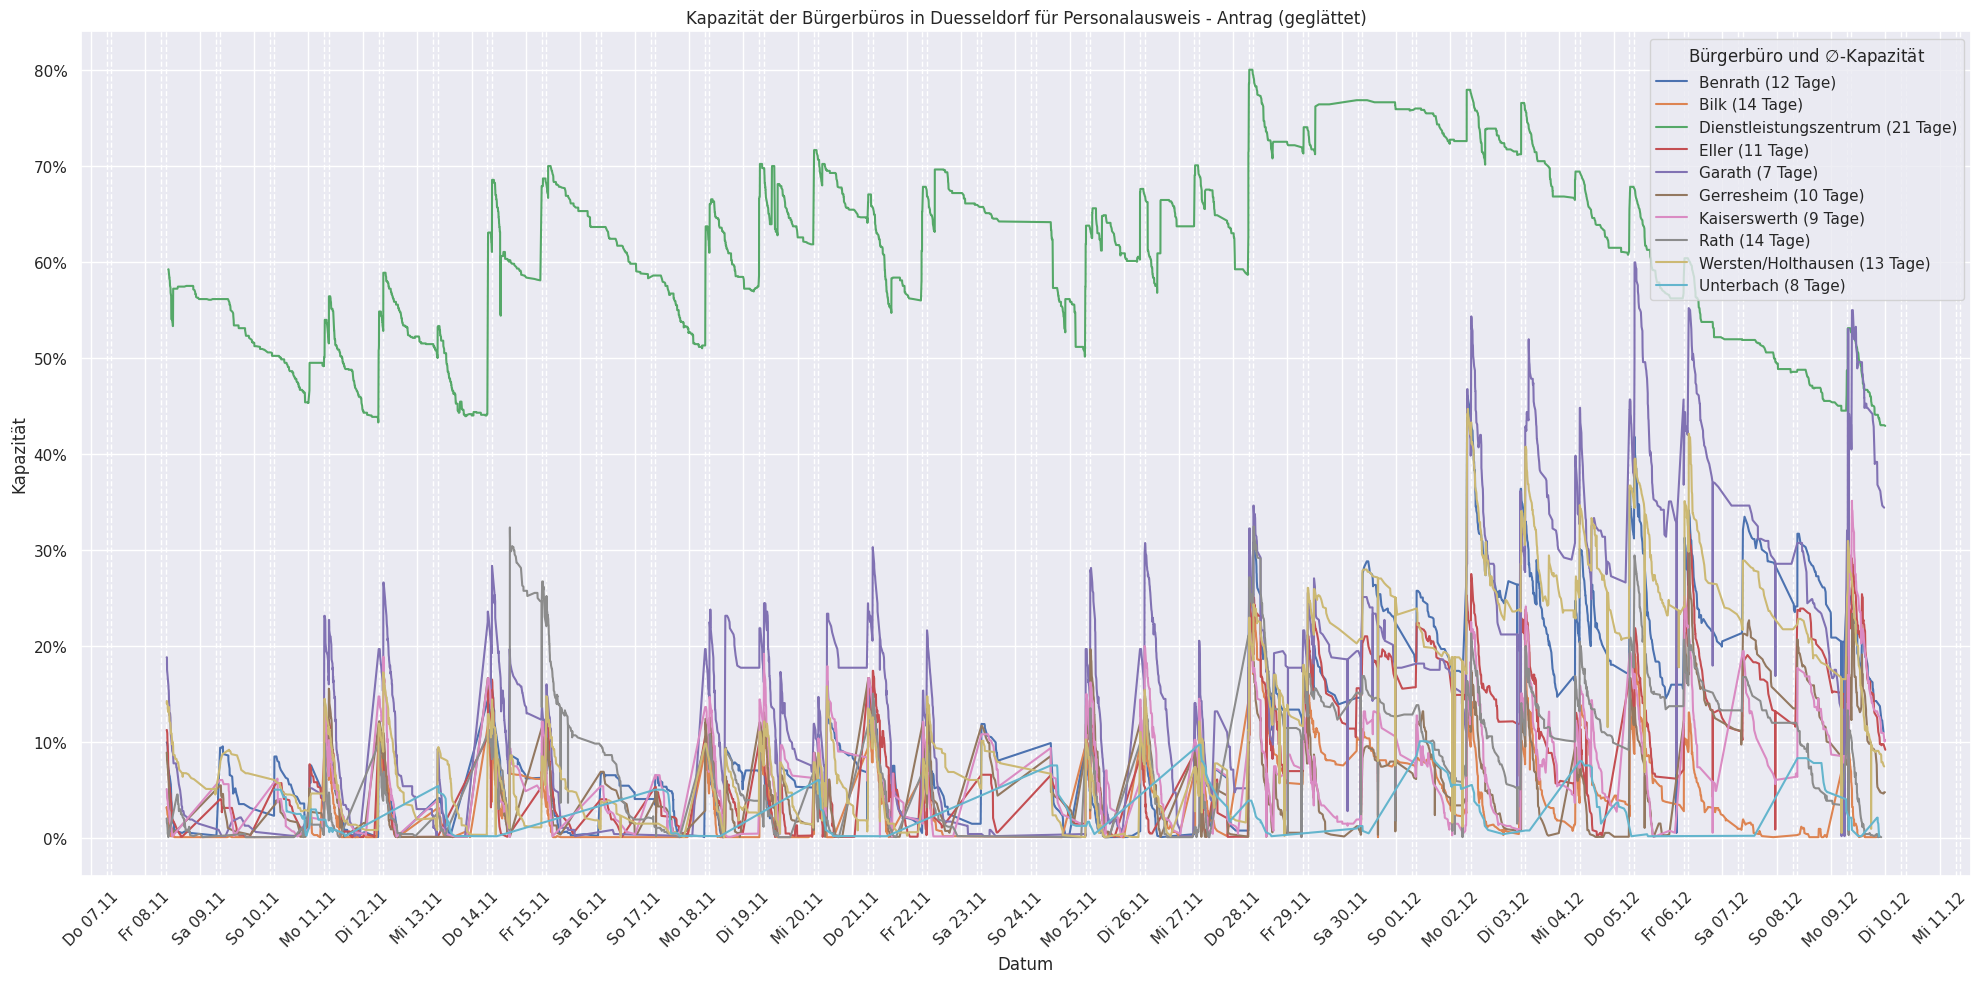

In [13]:
offices = [None]
offices = [
    "Benrath",
    "Bilk",
    "Dienstleistungszentrum",
    "Eller",
    "Garath",
    "Gerresheim",
    "Kaiserswerth",
    "Rath",
    "Wersten/Holthausen",
    "Unterbach",
]

fig, ax = plt.subplots(figsize=(20, 10))

max_days_per_office = {
        "Benrath": 12,
        "Bilk": 14,
        "Dienstleistungszentrum": 21,
        "Eller": 11,
        "Garath": 7,
        "Gerresheim": 10,
        "Kaiserswerth": 9,
        "Rath": 14,
        "Unterbach": 8,
        "Wersten/Holthausen": 13,
    }

for office in offices:
    count = viztool.create_time_series(
        duesseldorf,
        city="Duesseldorf",
        concern="Personalausweis - Antrag",
        office=office,
    )
    count["total_capacity"] = count["timestamp"].apply(
        lambda x: calc_capacity_per_office(office, x)
    )
    count["capacity"] = count["count"] / count["total_capacity"]
    
    count["smooth_count"] = count["count"].rolling(window=15).max()
    count["smooth_capacity"] = count["smooth_count"] / count["total_capacity"]

    sns.lineplot(
        data=count,
        x="timestamp",
        y="smooth_capacity" if office == "Dienstleistungszentrum" else "capacity",
        ax=ax,
        label=f"{office} ({max_days_per_office[office]} Tage)"
    )

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%a %d.%m"))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# # set y axis as percentage
# vals = ax.get_yticks()
# ax.set_yticklabels(["{:.0%}".format(x) for x in vals])

ax.yaxis.set_major_formatter(PercentFormatter(1))

ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=[7, 9]))
ax.xaxis.grid(True, which="minor", linestyle="--")

ax.set_title(
    "Kapazität der Bürgerbüros in Duesseldorf für Personalausweis - Antrag (geglättet)"
)
ax.set_xlabel("Datum")
ax.set_ylabel("Kapazität")

ax.legend(
    title="Bürgerbüro und $\\varnothing$-Kapazität",
)

plt.tight_layout()

plt.savefig(
    f"bachelorarbeit/bilder/kapazitaet_duesseldorf_alle_buergerbueros.png",
)
plt.show()

In [14]:
count_df = pd.DataFrame()

for office in offices:
    count_office = viztool.create_time_series(
        duesseldorf,
        city="Duesseldorf",
        concern="Personalausweis - Antrag",
        office=office,
    )

    count_office["office"] = office

    count_office["total_capacity"] = count_office["timestamp"].apply(
        lambda x: calc_capacity_per_office(office, x)
    )
    count_office["capacity"] = count_office["count"] / count_office["total_capacity"]

    count_office["days_until_slot"] = (
        duesseldorf[duesseldorf["office"] == office]["days_until_slot"]
        .max()
        .round(0)
        .astype(int)
    )

    count_office["smooth_count"] = count_office["count"].rolling(window=15).max()
    count_office["smooth_capacity"] = count_office["smooth_count"] / count_office[
        "total_capacity"
    ]

    count_df = pd.concat([count_df, count_office])

# print(count_df)
mean_capacity_per_office = (
    count_df.groupby(["office"]).mean().sort_values("capacity", ascending=False)
)


mean_capacity_per_office.loc["Alle"] = mean_capacity_per_office.agg(
    {
        "days_until_slot": "mean",
        "total_capacity": "sum",
        "count": "sum",
        "capacity": "mean",
    }
)
mean_capacity_per_office["mean_total_capacity"] = mean_capacity_per_office["total_capacity"].map(
    "{:.0f}".format
)

mean_capacity_per_office["days"] = mean_capacity_per_office["days_until_slot"].map(
    "{:.0f}".format
)

mean_capacity_per_office["mean_count"] = mean_capacity_per_office["count"].map(
    "{:.0f}".format
)
mean_capacity_per_office["smooth_count"] = mean_capacity_per_office["smooth_count"].map(
    "{:.0f}".format
)

mean_capacity_per_office["capacity"] = mean_capacity_per_office["capacity"].map(
    "{:.1%}".format
)


mean_capacity_per_office[["days", "mean_total_capacity", "mean_count", "capacity"]]

/tmp/ipykernel_696929/4256443055.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_capacity_per_office.loc["Alle"] = mean_capacity_per_office.agg(


,days,mean_total_capacity,mean_count,capacity
office,,,,
Dienstleistungszentrum,21,1386,769,55.5%
Garath,7,462,92,19.9%
Wersten/Holthausen,13,857,117,13.6%
Benrath,12,803,105,13.0%
Eller,11,749,76,10.2%
Rath,14,924,91,9.8%
Kaiserswerth,9,621,56,8.9%
Gerresheim,10,676,53,7.9%
Bilk,14,924,60,6.4%


In [15]:
# add column with the hour of the Taken timestamp

duesseldorf.loc[:, "taken_hour"] = duesseldorf.loc[:, "taken"].dt.hour

duesseldorf.loc[:, "available_hour"] = duesseldorf.loc[:, "available"].dt.hour

# set column to wether the column office is Dienstleistungszentrum or not
duesseldorf.loc[:, "is_dz"] = duesseldorf.loc[:, "office"] == "Dienstleistungszentrum"

d_sorted = duesseldorf.sort_values("count_availabilities", ascending=False)
d_sorted

/tmp/ipykernel_696929/3260723029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duesseldorf.loc[:, "taken_hour"] = duesseldorf.loc[:, "taken"].dt.hour
/tmp/ipykernel_696929/3260723029.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duesseldorf.loc[:, "available_hour"] = duesseldorf.loc[:, "available"].dt.hour
/tmp/ipykernel_696929/3260723029.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,Unnamed: 0,s_id,office,city,timeslot,concern,a_id,available,taken,count_availabilities,weekday,hour,delta,time_until_slot,total_delta,days_open,days_until_slot,taken_hour,available_hour,is_dz
292671,299996,6494,Dienstleistungszentrum,Duesseldorf,2024-11-28 11:15:00,Personalausweis - Antrag,299997,2024-11-14 08:36:00,2024-11-14 12:34:00,219,Thursday,11,0 days 03:58:00,13 days 22:41:00,19 days 15:24:00,19.64,13.95,12.00,8,True
292672,219730,6494,Dienstleistungszentrum,Duesseldorf,2024-11-28 11:15:00,Personalausweis - Antrag,219731,2024-11-13 21:37:00,2024-11-13 21:42:00,219,Thursday,11,0 days 00:05:00,14 days 13:33:00,19 days 15:24:00,19.64,14.56,21.00,21,True
292673,717514,6494,Dienstleistungszentrum,Duesseldorf,2024-11-28 11:15:00,Personalausweis - Antrag,717515,2024-11-26 06:24:00,2024-11-26 06:29:00,219,Thursday,11,0 days 00:05:00,2 days 04:46:00,19 days 15:24:00,19.64,2.20,6.00,6,True
292674,273840,6494,Dienstleistungszentrum,Duesseldorf,2024-11-28 11:15:00,Personalausweis - Antrag,273841,2024-11-14 05:18:00,2024-11-14 05:21:00,219,Thursday,11,0 days 00:03:00,14 days 05:54:00,19 days 15:24:00,19.64,14.25,5.00,5,True
292675,204759,6494,Dienstleistungszentrum,Duesseldorf,2024-11-28 11:15:00,Personalausweis - Antrag,204760,2024-11-13 18:40:00,2024-11-13 19:02:00,219,Thursday,11,0 days 00:22:00,14 days 16:13:00,19 days 15:24:00,19.64,14.68,19.00,18,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230681,5315,5316,Benrath,Duesseldorf,2024-11-08 10:00:00,Personalausweis - Antrag,5316,2024-11-08 09:27:00,2024-11-08 09:57:00,1,Friday,10,0 days 00:30:00,0 days 00:03:00,0 days 00:30:00,0.02,0.00,9.00,9,False
230680,5314,5315,Benrath,Duesseldorf,2024-11-08 09:55:00,Personalausweis - Antrag,5315,2024-11-08 09:27:00,2024-11-08 09:52:00,1,Friday,9,0 days 00:25:00,0 days 00:03:00,0 days 00:25:00,0.02,0.00,9.00,9,False
230679,5313,5314,Benrath,Duesseldorf,2024-11-08 09:50:00,Personalausweis - Antrag,5314,2024-11-08 09:27:00,2024-11-08 09:46:00,1,Friday,9,0 days 00:19:00,0 days 00:04:00,0 days 00:19:00,0.01,0.00,9.00,9,False
230678,5312,5313,Benrath,Duesseldorf,2024-11-08 09:45:00,Personalausweis - Antrag,5313,2024-11-08 09:27:00,2024-11-08 09:42:00,1,Friday,9,0 days 00:15:00,0 days 00:03:00,0 days 00:15:00,0.01,0.00,9.00,9,False


In [16]:
duesseldorf_only_first_available = duesseldorf.groupby("s_id").first("available")

duesseldorf_only_first_available

,Unnamed: 0,a_id,count_availabilities,hour,days_open,days_until_slot,taken_hour,available_hour,is_dz
s_id,,,,,,,,,
5311,5310,5311,1,9,0.00,0.00,9.00,9,False
5312,5311,5312,1,9,0.01,0.00,9.00,9,False
5313,5312,5313,1,9,0.01,0.00,9.00,9,False
5314,5313,5314,1,9,0.01,0.00,9.00,9,False
5315,5314,5315,1,9,0.02,0.00,9.00,9,False
...,...,...,...,...,...,...,...,...,...
119175,998644,998645,1,16,0.02,2.82,20.00,20,False
119176,998645,998646,1,16,0.04,2.80,21.00,20,False
119177,998646,998647,1,16,0.01,2.83,20.00,20,False


In [17]:
duesseldorf_only_last_taken = duesseldorf.groupby("s_id").last("taken")

duesseldorf_only_last_taken

,Unnamed: 0,a_id,count_availabilities,hour,days_open,days_until_slot,taken_hour,available_hour,is_dz
s_id,,,,,,,,,
5311,5310,5311,1,9,0.00,0.00,9.00,9,False
5312,5311,5312,1,9,0.01,0.00,9.00,9,False
5313,5312,5313,1,9,0.01,0.00,9.00,9,False
5314,5313,5314,1,9,0.01,0.00,9.00,9,False
5315,5314,5315,1,9,0.02,0.00,9.00,9,False
...,...,...,...,...,...,...,...,...,...
119175,998644,998645,1,16,0.02,2.82,20.00,20,False
119176,998645,998646,1,16,0.04,2.80,21.00,20,False
119177,998646,998647,1,16,0.01,2.83,20.00,20,False


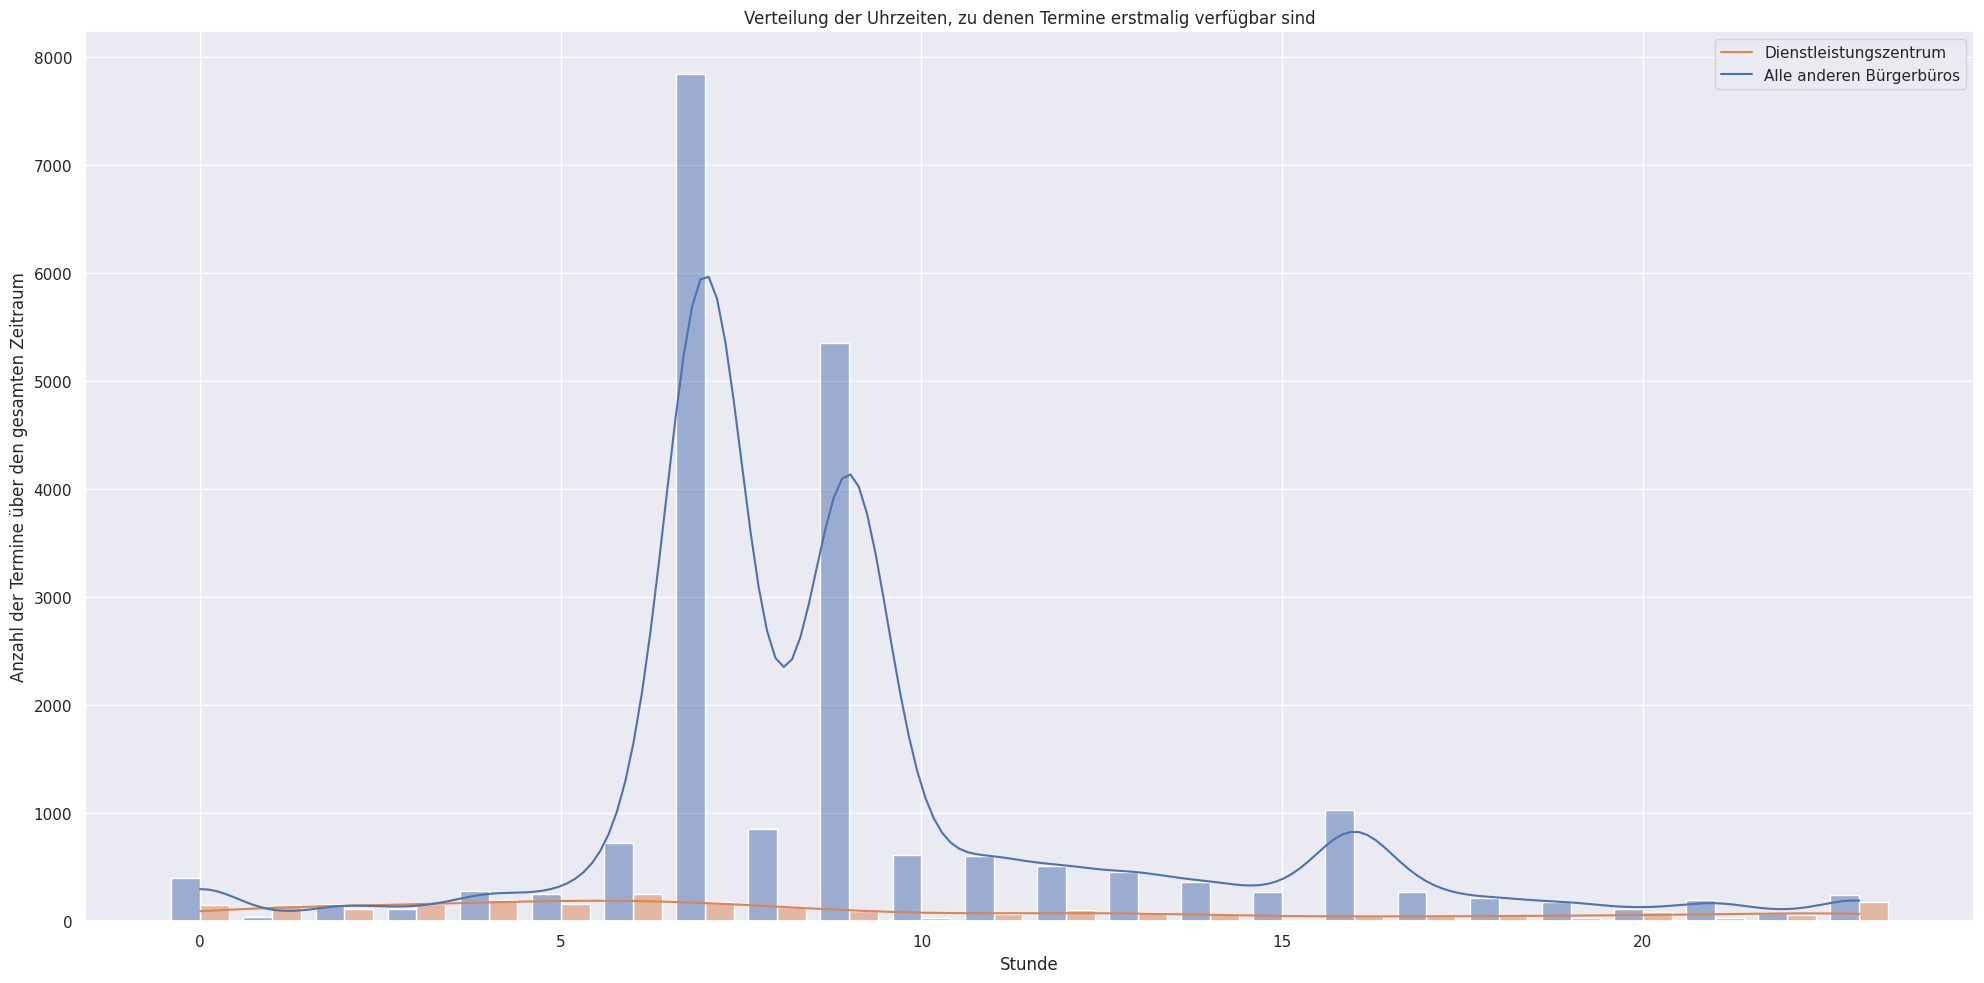

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(
    data=duesseldorf_only_first_available,
    x="available_hour",
    hue="is_dz",
    multiple="dodge",
    ax=ax,
    discrete=True,
    kde=True,
    shrink=0.8,
)

# ax.xaxis.set_major_locator(plt.MultipleLocator(1))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

ax.set_title("Verteilung der Uhrzeiten, zu denen Termine erstmalig verfügbar sind")
ax.set_xlabel("Stunde")
ax.set_ylabel("Anzahl der Termine über den gesamten Zeitraum")

ax.legend(
    labels=["Dienstleistungszentrum", "Alle anderen Bürgerbüros"],

)


plt.tight_layout()

plt.savefig(
    f"bachelorarbeit/bilder/verteilung_erstmalige_verfuegbarkeit.png",
)

plt.show()

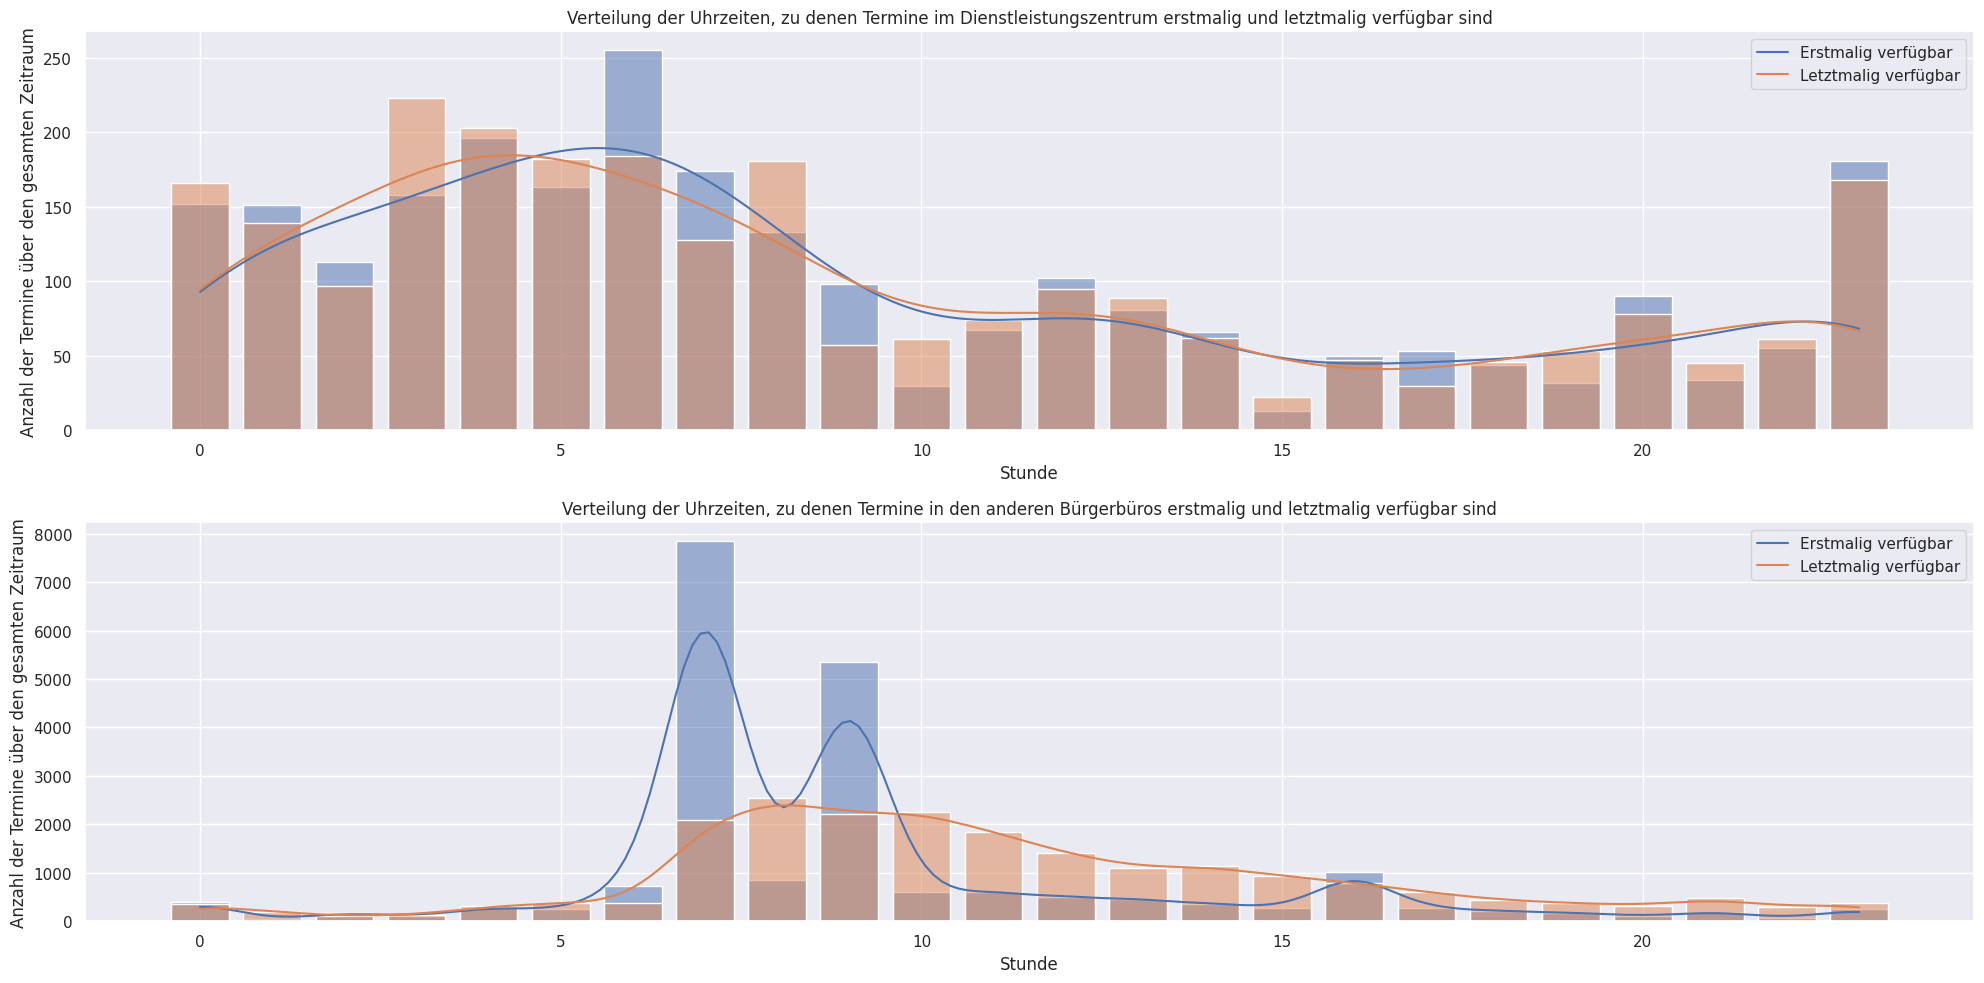

In [19]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=2, ncols=1)

sns.histplot(
    data=duesseldorf_only_first_available[
        duesseldorf_only_first_available["is_dz"] == True
    ],
    x="available_hour",
    # hue="is_dz",
    multiple="dodge",
    ax=ax[0],
    discrete=True,
    kde=True,
    shrink=0.8,
)

sns.histplot(
    data=duesseldorf_only_last_taken[
        duesseldorf_only_last_taken["is_dz"] == True
    ],
    x="taken_hour",
    # hue="is_dz",
    multiple="dodge",
    ax=ax[0],
    discrete=True,
    kde=True,
    shrink=0.8,
)


sns.histplot(
    data=duesseldorf_only_first_available[
        duesseldorf_only_first_available["is_dz"] == False
    ],
    x="available_hour",
    # hue="is_dz",
    multiple="dodge",
    ax=ax[1],
    discrete=True,
    kde=True,
    shrink=0.8,
)

sns.histplot(
    data=duesseldorf_only_last_taken[
        duesseldorf_only_last_taken["is_dz"] == False
    ],
    x="taken_hour",
    # hue="is_dz",
    multiple="dodge",
    ax=ax[1],
    discrete=True,
    kde=True,
    shrink=0.8,
)

ax[0].set_title("Verteilung der Uhrzeiten, zu denen Termine im Dienstleistungszentrum erstmalig und letztmalig verfügbar sind")
ax[0].set_xlabel("Stunde")
ax[0].set_ylabel("Anzahl der Termine über den gesamten Zeitraum")

ax[0].legend(
    labels=["Erstmalig verfügbar", "Letztmalig verfügbar"],
)

ax[1].set_title("Verteilung der Uhrzeiten, zu denen Termine in den anderen Bürgerbüros erstmalig und letztmalig verfügbar sind")
ax[1].set_xlabel("Stunde")
ax[1].set_ylabel("Anzahl der Termine über den gesamten Zeitraum")

ax[1].legend(
    labels=["Erstmalig verfügbar", "Letztmalig verfügbar"],
)

plt.tight_layout()

plt.savefig(
    f"bachelorarbeit/bilder/verteilung_erstmalige_letztmalige_verfuegbarkeit.png",
)

plt.show()

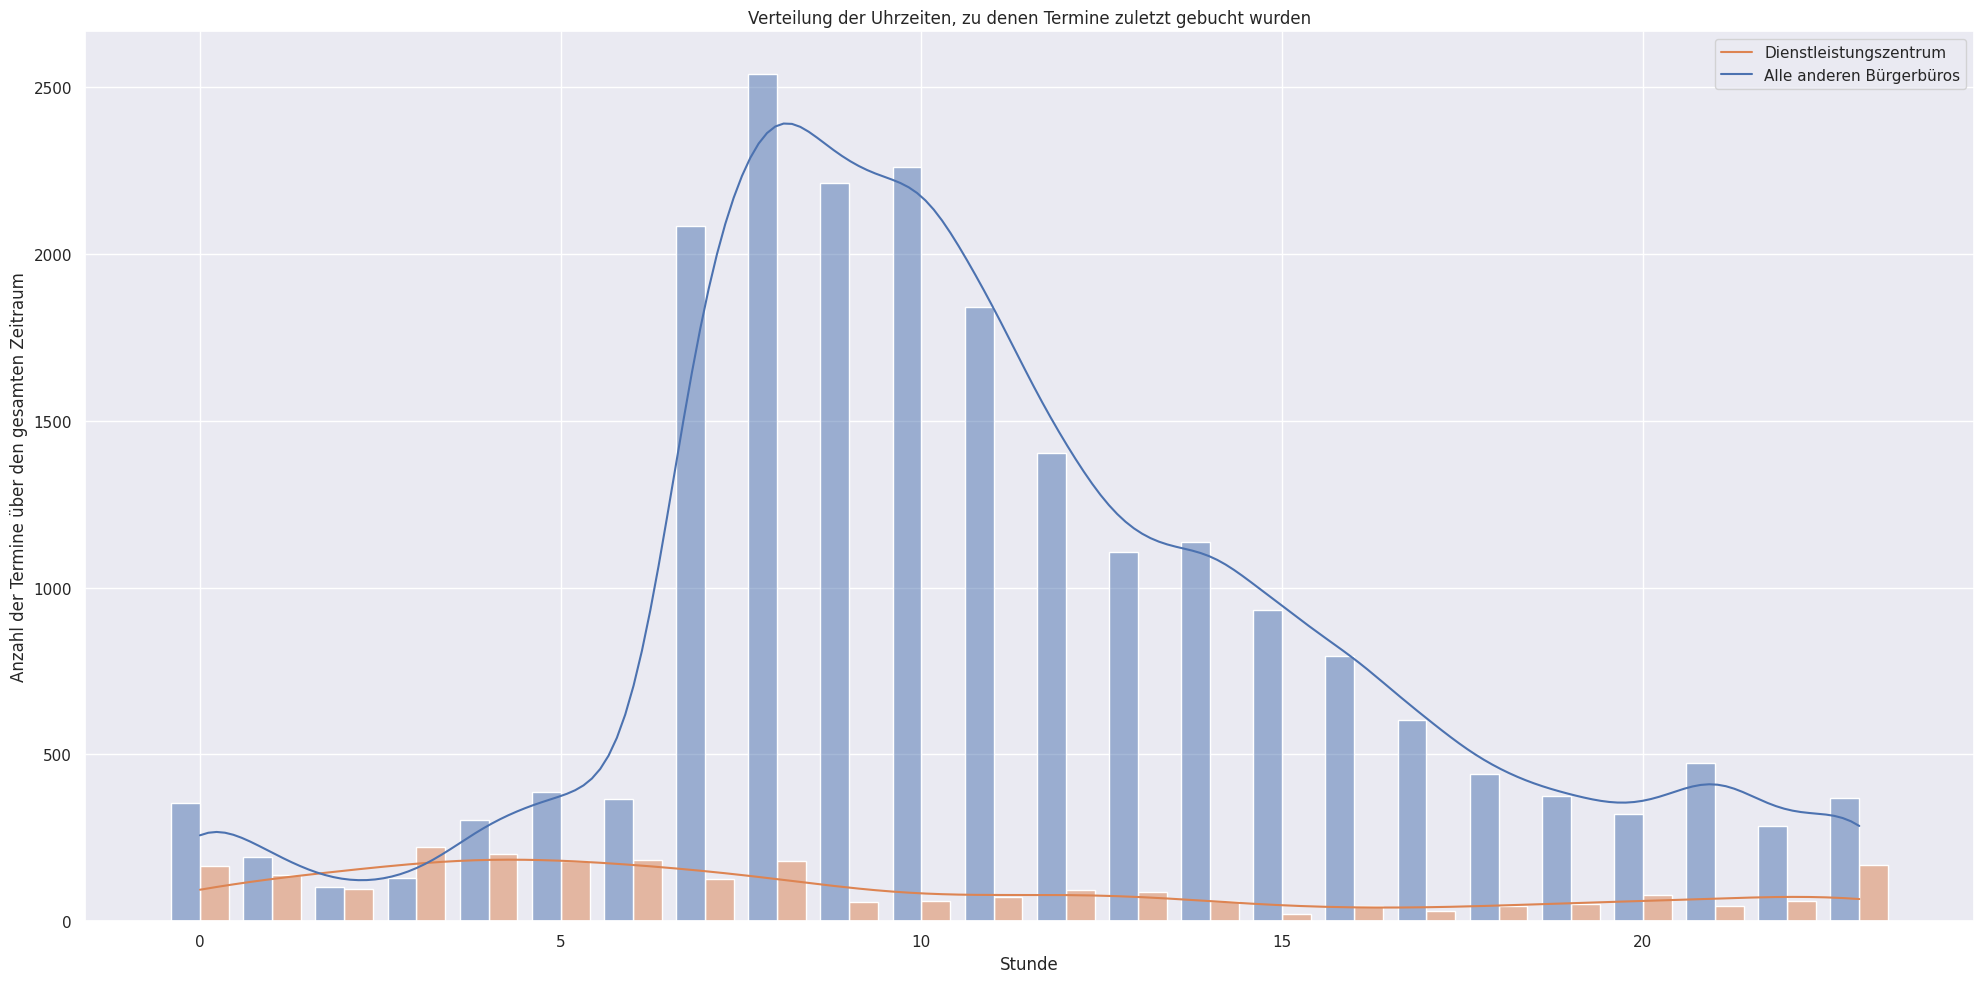

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(
    data=duesseldorf_only_last_taken,
    x="taken_hour",
    hue="is_dz",
    multiple="dodge",
    ax=ax,
    discrete=True,
    kde=True,
    shrink=0.8,
)

ax.set_title("Verteilung der Uhrzeiten, zu denen Termine zuletzt gebucht wurden")
ax.set_xlabel("Stunde")
ax.set_ylabel("Anzahl der Termine über den gesamten Zeitraum")

ax.legend(
    labels=["Dienstleistungszentrum", "Alle anderen Bürgerbüros"],

)

plt.tight_layout()

plt.savefig(
    f"bachelorarbeit/bilder/verteilung_letzte_buchung.png",
)

plt.show()

In [21]:
# dues_nur_dz = viztool.create_time_series(
#     df,
#     city="Duesseldorf",
#     concern="Personalausweis - Antrag",
#     office="Dienstleistungszentrum",
# )
# dues_nur_dz.describe()

In [22]:
# # rolling max
# dues_nur_dz["rolling_max"] = dues_nur_dz["count"].rolling(window=15).max()

# # dues_nur_dz
# dues_nur_dz["diff"] = dues_nur_dz["rolling_max"].diff()

# # remove all positive values
# dues_nur_dz[dues_nur_dz["diff"] > 0] = 0
# # remove outliers
# dues_nur_dz[dues_nur_dz["diff"] < -100] = 0

# dues_nur_dz["diff"] = dues_nur_dz["diff"].abs()

# # remove nan
# dues_nur_dz.dropna(inplace=True)

